In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

<span style="color:green;font-weight:bold; font-size:2em">1(a). Univariate analysis (5 marks)<span>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
columns = list(df.columns)
columns

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

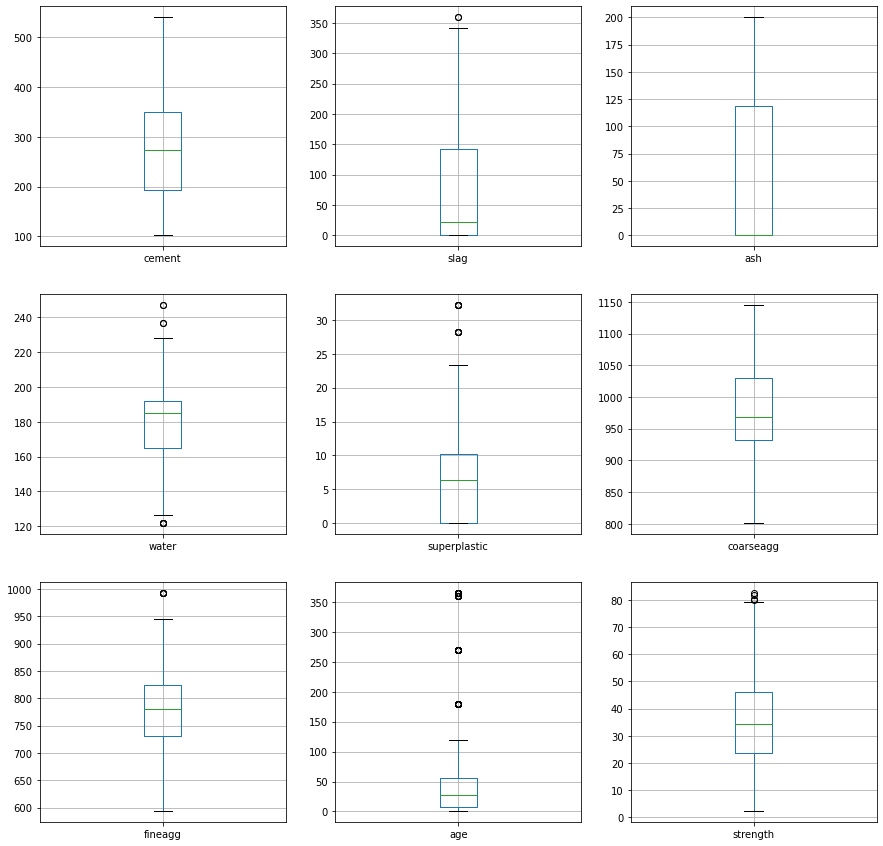

In [9]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(15,15))
i=1

for x in columns:
  ax=plt.subplot(3,3,i)
  df.boxplot(x)
  i +=1

   
<span style="color:blue;font-weight:bold; font-size:1.5em">There are no missing values<span>
    
<span style="color:blue;font-weight:bold; font-size:1.5em">From above boxplot we can see that there are few outliers in many columns. Those columns are:-<span>
    
    1. Slag
    2. Water
    3. Superplastic
    4. fineagg
    5. age
    6. strength

<span style="color:blue;font-weight:bold; font-size:1.5em">'Age' feature has highly skewed body.<span>

<span style="color:green;font-weight:bold; font-size:2em">1(b). Multivariate analysis (5 marks)<span>


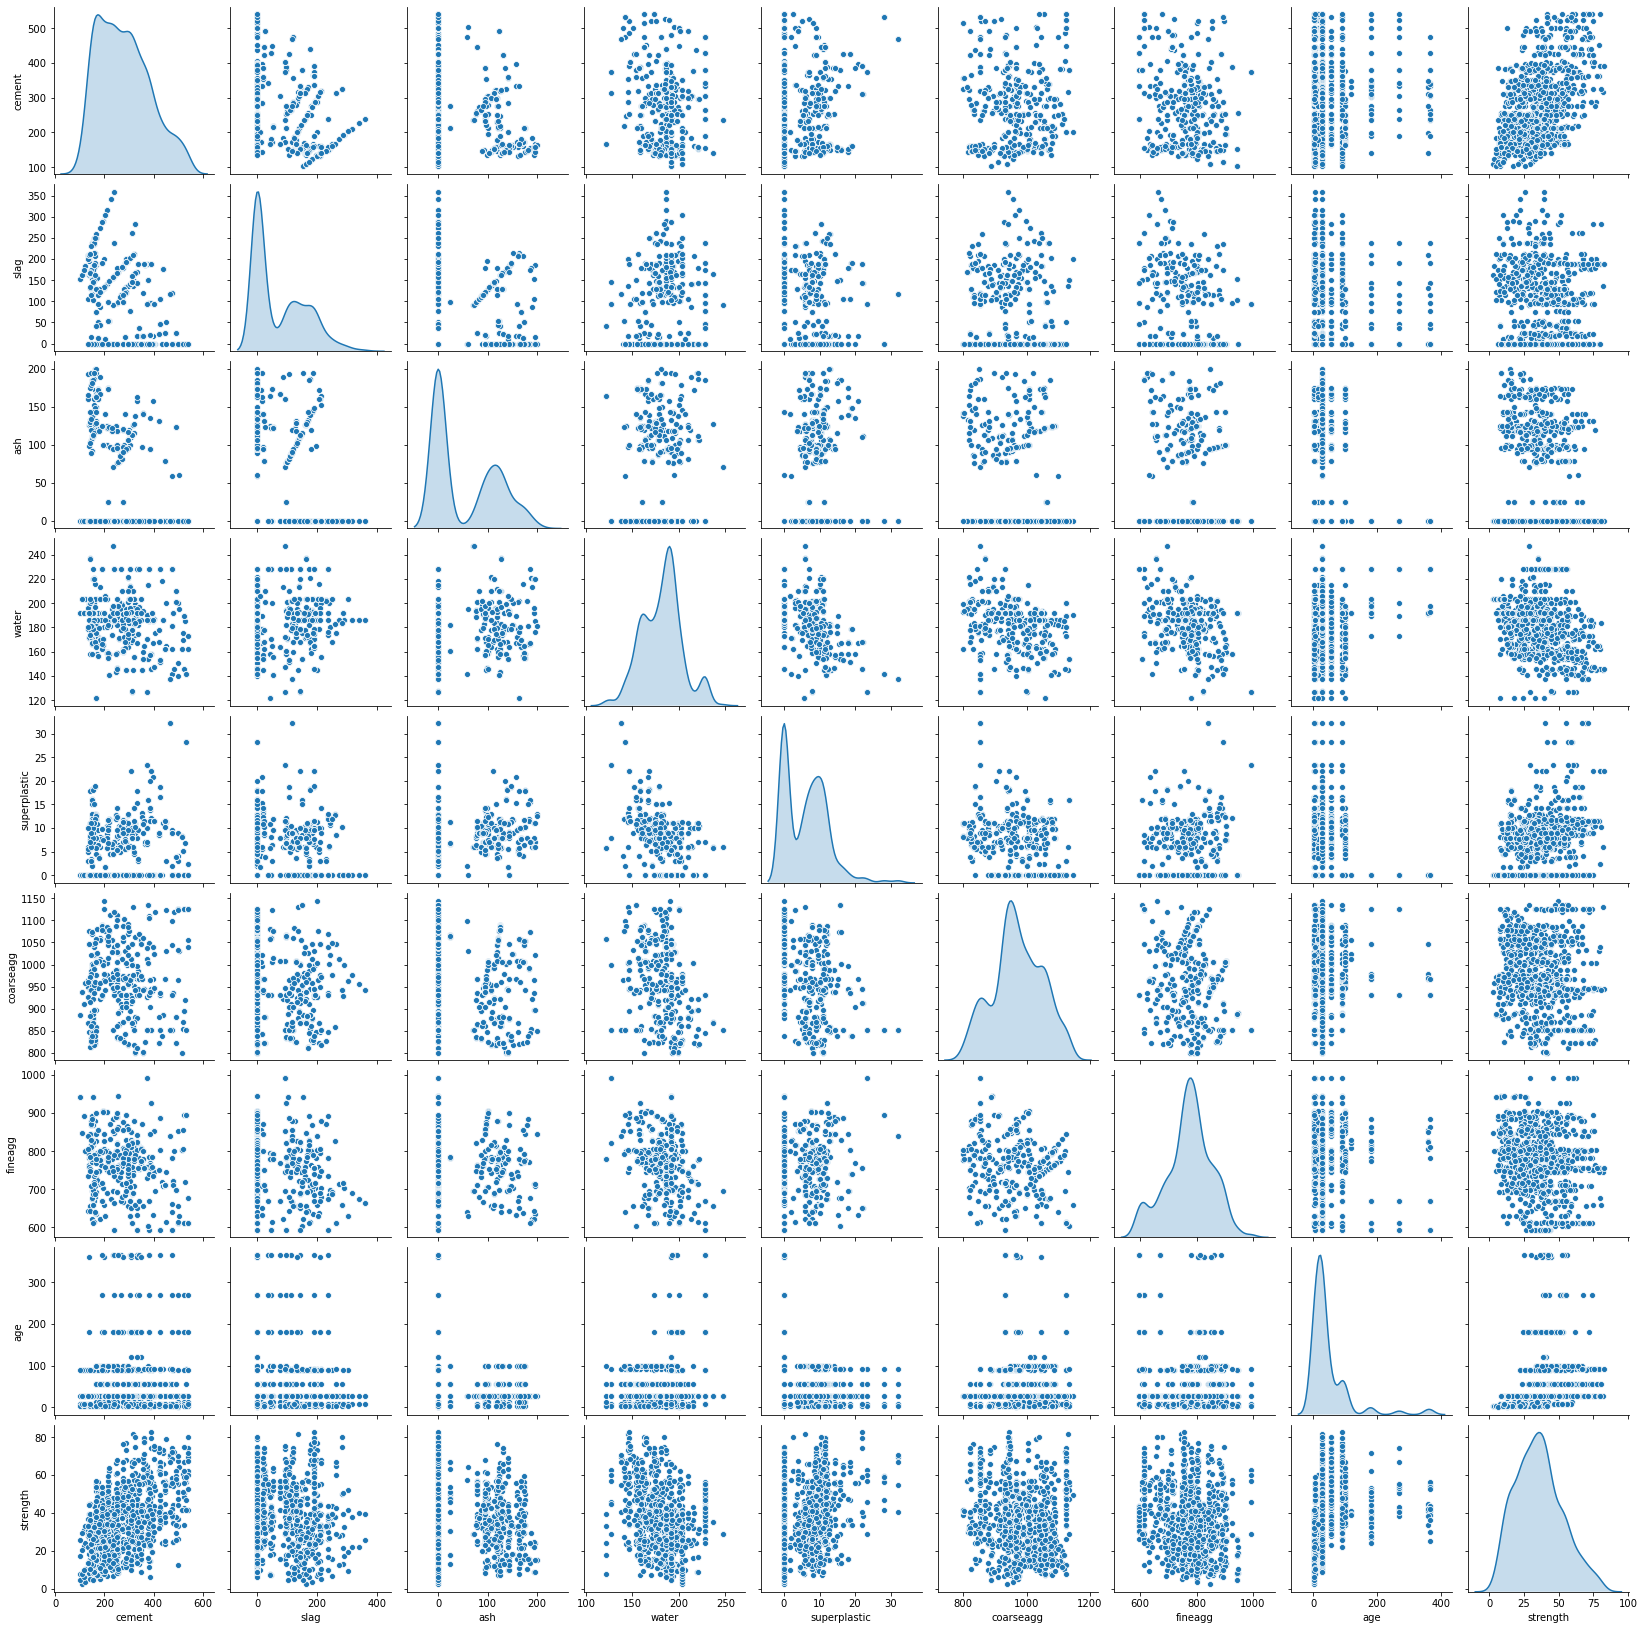

In [10]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

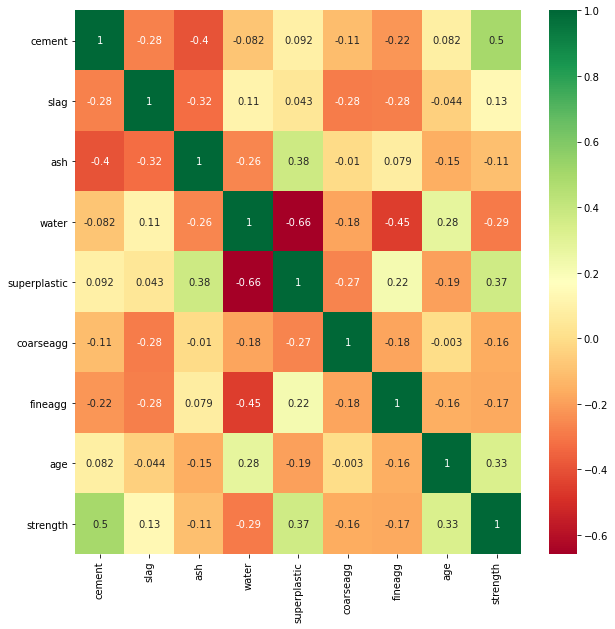

In [11]:
import matplotlib.pyplot as plt
corr=df.corr()
import seaborn as sns
plt.figure(figsize=(10,10))

sns.heatmap(corr,annot = True,cmap="RdYlGn")

<span style="color:blue;font-weight:bold; font-size:1.5em">From the above heatmap it is clear that the maximun correlation between any two columns is 0.5.<span>
    
<span style="color:blue;font-weight:bold; font-size:1.5em">On the contrary, there are columns with negative correlation. This means there is no information overlap. Every column has its importance and every column will contribute in and given unique information while doing prediction<span>

<span style="color:green;font-weight:bold; font-size:2em">2(a). Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks)<span>


# Droping a feature

<span style="color:blue;font-weight:bold; font-size:1.5em">From the above heatmap it is clear that there are no two columns with correlation greater than 0.5. So we need not to drop the columns.<span>

# Binning

<span style="color:purple;font-weight:bold; font-size:1.5em">'Age' is a columns on which we can apply some feature engineering. We can convert the continuous variable 'Age' into Categorical Feature.<span>

<span style="color:red;font-weight:bold; font-size:1.25em">Note:- We will not direclty using the Feature Engineered DataFrame for further processing. We will do the feature engineering. We will form the Bins. But we will use the DataFrame with bins only at the end and apply the model to find the accuracy of DataFrame with bins.<span>

In [12]:
df['age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [13]:
cut_points=[1,30,60,90,120,150,180,210,240,270,300,330,365]
labels=['Less_than_a_month','Between_1&2_Months','Between_2&3_Months','Between_3&4_Months','Between_4&5_Months','Between_5&6_Months',
        'Between_6&7_Months','Between_7&8_Months','Between_8&9_Months','Between_9&10_Months','Between_10&11_Months',
        'Between_11&12_Months']
df['Age_bins']=pd.cut(df['age'],bins=cut_points,labels=labels,include_lowest=True)


In [14]:
df.tail(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Age_bins
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,Less_than_a_month
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,Less_than_a_month
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,Less_than_a_month
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,Between_8&9_Months
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61,Less_than_a_month


<span style="color:red;font-weight:bold; font-size:1.25em">Note:- We have not dropped 'age' column as we will need it later.<span>

In [15]:
df.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Age_bins
226,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,56,51.72,Between_1&2_Months
79,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56,39.15,Between_1&2_Months
81,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90,31.02,Between_2&3_Months
662,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,28,24.85,Less_than_a_month
279,439.0,177.0,0.0,186.0,11.1,884.9,707.9,28,66.00,Less_than_a_month


In [16]:
dictionary={
    'Less_than_a_month'     : 0,
    'Between_1&2_Months'    : 1,
    'Between_2&3_Months'    : 2,
    'Between_3&4_Months'    : 3,
    'Between_4&5_Months'    : 4,
    'Between_5&6_Months'    : 5,
    'Between_6&7_Months'    : 6,
    'Between_7&8_Months'    : 7,
    'Between_8&9_Months'    : 8,
    'Between_9&10_Months'   : 9,
    'Between_10&11_Months'  : 10,
    'Between_11&12_Months'  : 11
}

In [17]:
df['Age_Bins']=df['Age_bins'].map(dictionary)
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Age_bins,Age_Bins
511,296.0,0.0,0.0,186.0,0.0,1090.0,769.0,28,25.18,Less_than_a_month,0
923,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7,14.99,Less_than_a_month,0
524,475.0,0.0,0.0,162.0,9.5,1044.0,662.0,28,58.52,Less_than_a_month,0
711,287.3,120.5,93.9,187.6,9.2,904.4,695.9,28,43.80,Less_than_a_month,0
419,480.0,0.0,0.0,192.0,0.0,936.0,721.0,90,54.28,Between_2&3_Months,2
336,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,100,52.96,Between_3&4_Months,3
101,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,Less_than_a_month,0
785,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56,Between_3&4_Months,3
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30,Between_1&2_Months,1
835,222.4,0.0,96.7,189.3,4.5,967.1,870.3,28,24.89,Less_than_a_month,0


In [18]:
df.drop('Age_bins',axis=1,inplace=True)

In [19]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Age_Bins
345,289.0,134.0,0.0,195.0,6.0,924.0,760.0,28,46.24,0
992,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29,0
433,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29,0
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.70,0
374,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28,25.97,0
537,387.0,20.0,94.0,157.0,13.9,938.0,845.0,56,47.97,1
959,313.0,145.0,0.0,178.0,8.0,867.0,824.0,28,44.39,0
299,198.6,132.4,0.0,192.0,0.0,978.4,825.5,3,9.13,0
335,350.0,0.0,0.0,203.0,0.0,974.0,775.0,90,31.35,2
171,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,56,48.59,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cement        1030 non-null   float64 
 1   slag          1030 non-null   float64 
 2   ash           1030 non-null   float64 
 3   water         1030 non-null   float64 
 4   superplastic  1030 non-null   float64 
 5   coarseagg     1030 non-null   float64 
 6   fineagg       1030 non-null   float64 
 7   age           1030 non-null   int64   
 8   strength      1030 non-null   float64 
 9   Age_Bins      1030 non-null   category
dtypes: category(1), float64(8), int64(1)
memory usage: 74.0 KB


In [21]:
df['Age_Bins']=df['Age_Bins'].astype('int32')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
 9   Age_Bins      1030 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 76.6 KB


<span style="color:green;font-weight:bold; font-size:2em">1(c). Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)<span>


# Missing Values

In [23]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
Age_Bins        0
dtype: int64

# Outliers

In [24]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'Age_Bins'],
      dtype='object')

<span style="color:red;font-weight:bold; font-size:1.25em">Note:- We will not be dropping outliers from 'age' column as 'age' is an important feature and there may not be any outliers but only important information in the guise of outliers. <span>

In [25]:
col_list=list(df.columns)
col_list.remove('strength')
col_list.remove('Age_Bins')
col_list.remove('age')

col_list

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']

In [26]:
IQR=[]
lowerthreshold=[]
upperthreshold=[]
numberofoutliers=[]

In [27]:
for x in col_list:
    Q1=df[x].quantile(0.25)
    Q3=df[x].quantile(0.75)
    iqr=Q3-Q1
    lower_thresh=Q1-(1.5*iqr)
    upper_thresh=Q3+(1.5*iqr)
    length_outliers=len(df[(df[x]>upper_thresh)|(df[x]<lower_thresh)])

    IQR.append(iqr)
    lowerthreshold.append(lower_thresh)
    upperthreshold.append(upper_thresh)
    numberofoutliers.append(length_outliers)

In [28]:
count_outliers=pd.DataFrame(numberofoutliers,columns=['Number of Outliers'],
                             index=col_list)
count_outliers

,Number of Outliers
cement,0
slag,2
ash,0
water,9
superplastic,10
coarseagg,0
fineagg,5


<span style="color:purple;font-weight:bold; font-size:1.25em">Above are the number of outliers for each column<span>

In [29]:
df.shape

(1030, 10)

In [30]:
numberofoutliers_1=[]

In [31]:
for x,upper,lower in zip(col_list,upperthreshold,lowerthreshold):
    
    df=df[(df[x]<upper)&(df[x]>lower)]
    
    length_outliers_1=len(df[(df[x]>upper)|(df[x]<lower)])
    
    numberofoutliers_1.append(length_outliers_1)

In [32]:
count_outliers_1=pd.DataFrame(numberofoutliers_1,columns=['Number of Outliers'],
                             index=col_list)
count_outliers_1

,Number of Outliers
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0


In [33]:
df.shape

(1004, 10)

<span style="color:green;font-weight:bold; font-size:1.25em">As you can see above, we have successfully removed outliers from all the columns. There were total 26 outliers. You can also check the shape of DataFrame after removing outliers.<span>

<span style="color:red;font-weight:bold; font-size:1.25em">Note:- Let us make a copy of DataFrame of Bin as we will need it at the end to apply the model to find the accuracy. Also, after making the copy of the DataFrame we will drop the 'Age_Bins' columns so that we have only 'age' column in the DataFrame.<span>

In [34]:
df_age_bin=df.copy()

In [35]:
df.drop('Age_Bins',axis=1,inplace=True)
df.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51


<span style="color:green;font-weight:bold; font-size:2em">2(c). Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)<span>


In [36]:
import scipy.stats as stat
import pylab

In [37]:
column_list=list(df.columns)

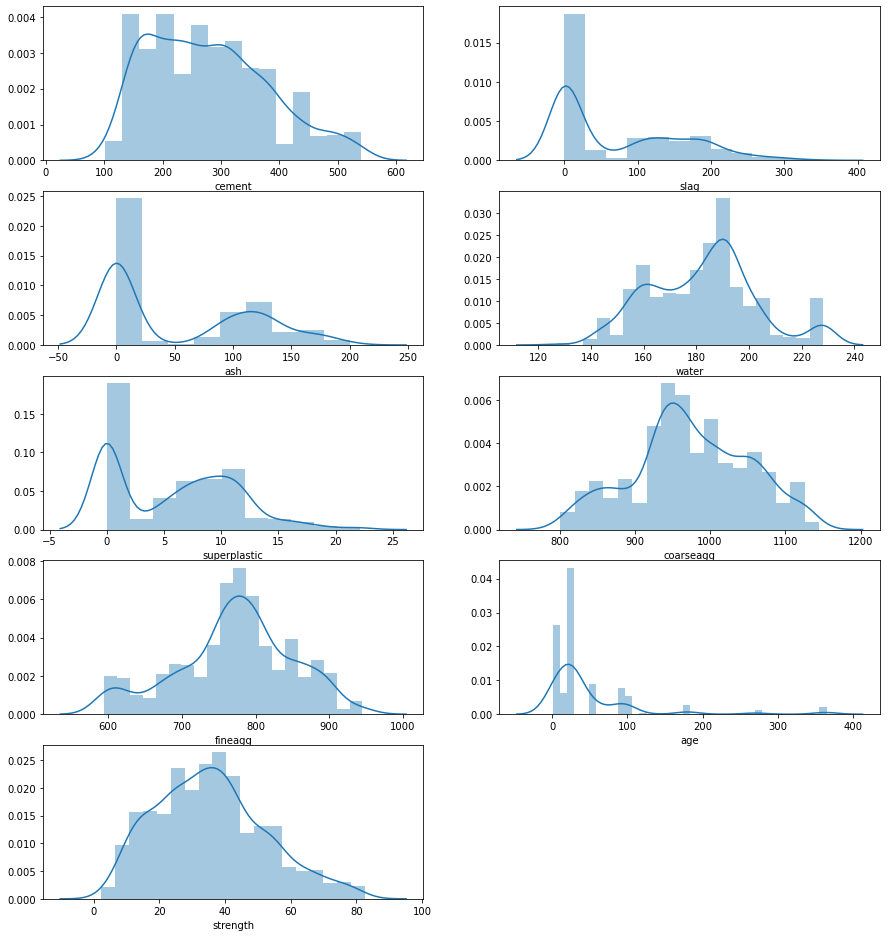

In [38]:
figure=plt.figure(figsize=(15,30))
i=1

for x in column_list:
  ax=plt.subplot(9,2,i)
  sns.distplot(df[x],kde=True)
  i +=1

<span style="color:purple;font-weight:bold; font-size:1.25em">From the above graphs we can say that our target column - 'strength' is more or less normally distributed.<span>
    
<span style="color:purple;font-weight:bold; font-size:1.25em">Features such as slag, ash ,water, superplastic have double hunch in thier normal distribution. This shows that the data in these columns are distributed around two values. <span>
    
<span style="color:purple;font-weight:bold; font-size:1.25em">Conclusion:- We choose not to apply any kind of transformation to these features as these features may be giving important information.<span>

<span style="color:green;font-weight:bold; font-size:2em">2(b). Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)<span>


In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
X=df.drop('strength',axis=1)
y=df['strength']

In [41]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [42]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.6355250889860851

In [43]:
lr.score(x_test,y_test)

0.5935919808774156

<span style="color:red;font-weight:bold; font-size:1.25em">Test Accuracy with Linear Model is  59.35%<span>

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)


In [45]:
print(poly_clf.score(x_train2, y_train))

0.93314923131256


In [46]:
print(poly_clf.score(x_test2, y_test))

0.8348116461469942


In [47]:
print(x_train.shape)
print(x_train2.shape)

(702, 8)
(702, 165)


In [48]:
print(x_test.shape)
print(x_test2.shape)

(302, 8)
(302, 165)


<span style="color:red;font-weight:bold; font-size:1.25em">Test Accuracy after applying polynomial model, with degree =3, Trinomial model, is increased to 83.48% from 59%<span>

<span style="color:red;font-weight:bold; font-size:1.25em">Although this increased accuracy comes at the cost of model becoming complex with total number of features increasing to 165 from 8<span>

<span style="color:green;font-weight:bold; font-size:2em">3. Deliverable -3 (create the model ) ( 15 marks)
a. Obtain feature importance for the individual features and present your findings<span>


<span style="color:blue;font-weight:bold; font-size:1.25em">Creating Decision Tree Regressor Model<span>

In [49]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor()

In [50]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
dtree.score(x_train,y_train)

0.9991156139589159

In [52]:
dtree.score(x_test,y_test)

0.8130225742585109

<span style="color:red;font-weight:bold; font-size:1.25em">Extracting Feature Importance<span>

In [53]:
pd.DataFrame(dtree.feature_importances_,columns=['Feature Importance'], index=x_train.columns).sort_values(by='Feature Importance',ascending=False)

,Feature Importance
age,0.353256
cement,0.346395
water,0.085161
slag,0.080856
superplastic,0.066123
coarseagg,0.027445
ash,0.022376
fineagg,0.018388


<span style="color:red;font-weight:bold; font-size:1.25em">From above we can say that top 2 feautres viz: 'age' & 'cement' contributes to 70% importance.<span>
    
<span style="color:red;font-weight:bold; font-size:1.25em">The other three features viz:- 'water', 'slag', 'superplastic' contributes to 24.7%. <span>
    
<span style="color:red;font-weight:bold; font-size:1.25em">Thus top 5 features contributes 95% of the importance.<span>

<span style="color:green;font-weight:bold; font-size:2em">4a. Algorithms that you think will be suitable for this project (5 marks)<span>


# XGBoost Regressor


In [54]:
import xgboost
regressor=xgboost.XGBRegressor()

In [55]:
regressor.fit(x_train,y_train)

[15:23:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [56]:
print(regressor.score(x_train,y_train))
print(regressor.score(x_test,y_test))

0.9513224104601545
0.8967704086466808


# Bagging Regressor

In [57]:
from sklearn.ensemble import BaggingRegressor
bgcl=BaggingRegressor()

In [58]:
bgcl.fit(x_train,y_train)

BaggingRegressor()

In [59]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.9792478762260828
0.8940446658280915


# Random Forest

In [60]:
from sklearn.ensemble import  RandomForestRegressor
rf =  RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9862913660101307
0.9010230658418824


<span style="color:red;font-weight:bold; font-size:1.25em">From the above three models we can say that Random Forest Regressor performs better on Training as well as Test accuracy<span>

<span style="color:green;font-weight:bold; font-size:2em">4b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)<span>


In [62]:
params={
    'n_estimators'      : [10,15,20,21,25,50,75,100,150,200],
    'max_depth'         : [1,3,5,7,9,11,15,17,19,22],
    'min_samples_split' : [2,3,5,7,9,11,13,15,17,19,21]
}

In [63]:
from sklearn.ensemble import  RandomForestRegressor
rfr =  RandomForestRegressor()

In [64]:
from sklearn.model_selection import GridSearchCV
rfr_GS = GridSearchCV(rfr,param_grid=params,n_jobs=-1,cv=10)


In [65]:
rfr_GS.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 15, 17, 19, 22],
                         'min_samples_split': [2, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19, 21],
                         'n_estimators': [10, 15, 20, 21, 25, 50, 75, 100, 150,
                                          200]})

In [66]:
rfr_GS.best_estimator_

RandomForestRegressor(max_depth=17)

In [67]:
randomforest=rfr_GS.best_estimator_
randomforest.fit(x_train,y_train)
print(randomforest.score(x_train,y_train))
print(randomforest.score(x_test,y_test))

0.9858908651823907
0.9009898361676059


<span style="color:red;font-weight:bold; font-size:1.25em">In the above case after applying GridSearchCV to Randomforest we can say that not much difference has been made. The Test accuracy of the RF model before and after applying GridSearch is 90% & 90% respectively<span>

In [68]:
import xgboost
xgbregressor=xgboost.XGBRegressor()

In [69]:
param_xgb={
    'max_depth'       : [3,5,7,10,15,20,25,30],
    'learning_rate'   : [0.001,0.01,0.1,0.3,0.5,0.8],
    'n_estimators'    : [20,50,70,100,125,150,200,300]
}

In [70]:
from sklearn.model_selection import GridSearchCV
xgb_GS = GridSearchCV(xgbregressor,param_grid=param_xgb,n_jobs=-1,cv=10)


In [71]:
xgb_GS.fit(x_train,y_train)

[15:33:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.8],
                         'max_depth': [3, 5, 7, 10, 15, 20, 25, 30],
                         'n_estimators': [20, 50, 70, 100, 125, 150, 200, 300]})

In [72]:
xgb_GS.best_estimator_

XGBRegressor(learning_rate=0.3, n_estimators=300)

In [85]:
xgb=xgboost.XGBRegressor(learning_rate=0.3, n_estimators=300)
xgb.fit(x_train,y_train)
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

[15:35:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8704028019686609
0.6630456509032585


<span style="color:red;font-weight:bold; font-size:1.25em">Here also we can see that the model performance falls after applying GridSearchCV<span>

<span style="color:green;font-weight:bold; font-size:2em">4c. Model performance range at 95% confidence level (10 marks)<span>


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [75]:
kfold = KFold(n_splits=50, random_state=20,shuffle=True)
model = RandomForestRegressor()
results = cross_val_score(model, X, y, cv=kfold)

In [76]:
print(results)
print(f"\n\n The mean of all Scores is : {results.mean() *100}%  \n The Std Dev. of all scores is: {results.std()*100}%")

[0.94120698 0.78961472 0.82785428 0.91352959 0.90052452 0.9703022
 0.94178118 0.96601179 0.96549714 0.93673041 0.9084567  0.865085
 0.93156696 0.84020274 0.95577701 0.96830362 0.93121411 0.96118756
 0.91886151 0.95178427 0.87572956 0.925819   0.93176112 0.91521977
 0.88277234 0.9282703  0.95313753 0.93236077 0.93004139 0.95056328
 0.7503758  0.94202393 0.72574165 0.97247088 0.91922917 0.91341726
 0.88276806 0.89793549 0.92563957 0.93163823 0.94500363 0.96693647
 0.95442832 0.95629389 0.73018732 0.95700268 0.95363538 0.94939392
 0.94098762 0.90311664]


 The mean of all Scores is : 91.45878648096398%  
 The Std Dev. of all scores is: 5.859049944136523%


In [77]:
meanperform=results.mean()
deviation=results.std()
lowerrange=((meanperform-(2*deviation))*100).round(3)
upperrange=((meanperform+(2*deviation))*100).round(3)

In [78]:
print(f"The range for 95% confidence interval is from {lowerrange}% to {upperrange}%")

The range for 95% confidence interval is from 79.741% to 103.177%


<span style="color:red;font-weight:bold; font-size:1.25em">As we can see that the upper range of confidence interval is 103.177%. This is so because if we check all the values of the return, we see that all 50 values donot form perfect normal distribution.<span>
    
<span style="color:red;font-weight:bold; font-size:1.25em">Majority values are near or above 90% and this forms right skewed distribution.<span>

<span style="color:red;font-weight:bold; font-size:1.25em">Hence we are getting the upper value in confidence interval as out of range.<span>

<span style="color:green;font-weight:bold; font-size:2em">Applying model to find accuracy after doing feature engineering(Binning) of DataFrame<span>


In [79]:
df_age_bin.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Age_Bins
824,250.0,180.0,95.0,159.0,9.5,860.0,800.0,28,67.87,0
798,222.4,0.0,96.7,189.3,4.5,967.1,870.3,3,11.58,0
347,192.0,288.0,0.0,192.0,0.0,929.8,716.1,90,50.73,2
818,250.0,0.0,0.0,182.0,0.0,1100.0,820.0,28,20.87,0
375,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83,0


In [80]:
df_age_bin.drop('age',axis=1,inplace=True)
df_age_bin.sample(8)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,Age_Bins
367,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,17.34,0
162,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,18.13,0
165,255.5,170.3,0.0,185.7,0.0,1026.6,724.3,17.24,0
734,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,52.20,0
849,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,15.87,0
512,313.8,0.0,112.6,169.9,10.1,925.3,782.9,38.46,0
869,516.0,0.0,0.0,162.0,8.2,801.0,802.0,41.37,0
561,173.0,116.0,0.0,192.0,0.0,946.8,856.8,24.28,0


In [81]:
X=df_age_bin.drop('strength',axis=1)
y=df_age_bin['strength']

In [82]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [83]:
from sklearn.ensemble import  RandomForestRegressor
rf_bin =  RandomForestRegressor()

rf_bin.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
print(rf_bin.score(x_train,y_train))
print(rf_bin.score(x_test,y_test))

0.8615860773759044
0.659529892991473


<span style="color:red;font-weight:bold; font-size:1.25em">From the above example we can say that if we use the DataFrame where we have applied feature engineering of Binning, the accuracy of the model falls drastically after applying Binning<span>